<a href="https://colab.research.google.com/github/JakeOh/202011_itw_bd21/blob/main/lab_python/python45_image_crawling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# icrawler 패키지를 사용한 이미지 다운로드

참고

*   https://icrawler.readthedocs.io/
*   https://pypi.org/project/icrawler/


In [1]:
# Google Colab에서 할당받은 가상 머신에는 icrawler 패키지가 설치되어 있지 않음.
# icrawler 패키지의 기능들을 사용하려면, 먼저 설치를 진행해야 함.
# Jupyter Notebook의 코드 셀에서 외부 명령(콘솔에서 실행시키는 명령)을 실행할 때는 !로 시작
!pip install icrawler

In [4]:
import os  
# 파일, 디렉토리(폴더) 생성, 삭제 등의 관리

from icrawler.builtin import BingImageCrawler, BaiduImageCrawler, GoogleImageCrawler
# icrawler 패키지의 builtin 모듈에서 클래스 BingImageCrawler, BaiduImageCrawler를 임포트

In [5]:
# Google Drive mount
default_dir = '/content/drive/MyDrive'

download_dir = os.path.join(default_dir, 'downloads')  
#> /content/drive/MyDrive/downloads

bing_dir = os.path.join(download_dir, 'bing')
#> /content/drive/MyDrive/downloads/bing: Bing 검색 엔진으로 검색된 이미지들을 저장할 디렉토리

baidu_dir = os.path.join(download_dir, 'baidu')
#> /content/drive/MyDrive/downloads/baidu: Baidu 검색 엔진으로 검색된 이미지들을 저장할 디렉토리

In [9]:
if not os.path.exists(bing_dir):  # bing 디렉토리가 존재하지 않으면,
    os.makedirs(bing_dir)         # 디렉토리를 생성

if not os.path.exists(baidu_dir):  # baidu 디렉토리가 존재하지 않으면,
    os.makedirs(baidu_dir)         # 디렉토리를 생성

In [10]:
# BingImageCrawler 클래스의 인스턴스 생성
bing_crawler = BingImageCrawler(storage={'root_dir': bing_dir})

In [11]:
# crawler 객체의 crawl 메서드를 호출 -> 이미지 다운로드
bing_crawler.crawl(keyword='dog', max_num=10)

2021-02-04 07:05:25,049 - INFO - icrawler.crawler - start crawling...
2021-02-04 07:05:25,051 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-02-04 07:05:25,054 - INFO - feeder - thread feeder-001 exit
2021-02-04 07:05:25,056 - INFO - icrawler.crawler - starting 1 parser threads...
2021-02-04 07:05:25,063 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-02-04 07:05:25,351 - INFO - parser - parsing result page https://www.bing.com/images/async?q=dog&first=0
2021-02-04 07:05:25,653 - ERROR - downloader - Response status code 404, file https://upload.wikimedia.org/wikipedia/commons/thumb/b/b8/Australian_Catle_Dog_Silverbarn's_Paavo.jpg
2021-02-04 07:05:25,823 - INFO - downloader - image #1	https://img.thrfun.com/img/083/608/panting_dog_x1.jpg
2021-02-04 07:05:25,941 - ERROR - downloader - Response status code 403, file https://peopledotcom.files.wordpress.com/2017/05/downward-dog-2.jpg
2021-02-04 07:05:26,517 - INFO - downloader - image #2	https://www.quicka

In [12]:
import matplotlib.pyplot as plt
from PIL import Image

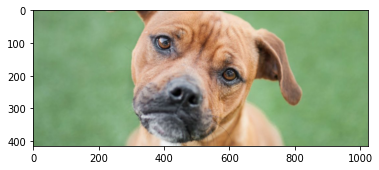

In [22]:
image_file = os.path.join(bing_dir, '000001.jpg')  # 이미지 파일 이름
image = Image.open(image_file)  # 이미지 파일
plt.imshow(image)  # 이미지 파일 콘솔 출력

In [23]:
google_crawler = GoogleImageCrawler(storage={'root_dir': download_dir})
google_crawler.crawl(keyword='cat', max_num=10)

2021-02-04 07:37:38,140 - INFO - icrawler.crawler - start crawling...
2021-02-04 07:37:38,142 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-02-04 07:37:38,144 - INFO - feeder - thread feeder-001 exit
2021-02-04 07:37:38,144 - INFO - icrawler.crawler - starting 1 parser threads...
2021-02-04 07:37:38,149 - INFO - icrawler.crawler - starting 1 downloader threads...
2021-02-04 07:37:38,685 - INFO - parser - parsing result page https://www.google.com/search?q=cat&ijn=0&start=0&tbs=&tbm=isch
Exception in thread parser-001:
Traceback (most recent call last):
  File "/usr/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/dist-packages/icrawler/parser.py", line 104, in worker_exec
    for task in self.parse(response, **kwargs):
TypeError: 'NoneType' object is not iterable

2021-02-04 07:37:43,156 - INFO - downloader - 

In [30]:
baidu_crawler = BaiduImageCrawler(storage={'root_dir': baidu_dir},
                                  parser_threads=2,
                                  downloader_threads=4)
baidu_crawler.crawl(keyword='cat', max_num=10, overwrite=True)

2021-02-04 07:51:05,894 - INFO - icrawler.crawler - start crawling...
2021-02-04 07:51:05,898 - INFO - icrawler.crawler - starting 1 feeder threads...
2021-02-04 07:51:05,901 - INFO - feeder - thread feeder-001 exit
2021-02-04 07:51:05,902 - INFO - icrawler.crawler - starting 2 parser threads...
2021-02-04 07:51:05,910 - INFO - icrawler.crawler - starting 4 downloader threads...
2021-02-04 07:51:07,617 - INFO - parser - parsing result page http://image.baidu.com/search/acjson?tn=resultjson_com&ipn=rj&word=cat&pn=0&rn=30
2021-02-04 07:51:07,911 - INFO - parser - no more page urls for thread parser-002 to parse
2021-02-04 07:51:07,912 - INFO - parser - thread parser-002 exit
2021-02-04 07:51:08,655 - INFO - downloader - image #1	https://gimg2.baidu.com/image_search/src=http%3A%2F%2Fimages.88db.com.hk%2F5469084-01118.JPG&refer=http%3A%2F%2Fimages.88db.com.hk&app=2002&size=f9999,10000&q=a80&n=0&g=0n&fmt=jpeg?sec=1615017067&t=052f064970c017a6f1d56496edb00c04
2021-02-04 07:51:09,023 - INFO -

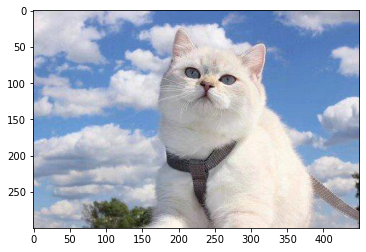

In [31]:
image_file = os.path.join(baidu_dir, '000001.jpg')
image = Image.open(image_file)
plt.imshow(image)

# BeautiSoup을 이용한 네이버 이미지 검색, 다운로드

In [32]:
import requests
import os
from urllib.request import urlopen, urlretrieve
from bs4 import BeautifulSoup

In [33]:
naver_dir = os.path.join(download_dir, 'naver')  # 파일 저장 디렉토리 경로
if not os.path.exists(naver_dir):  # 디렉토리가 없으면
    os.makedirs(naver_dir)  # 디렉토리 생성

In [34]:
url = 'https://search.naver.com/search.naver?where=image'
req_params = {'query': '강아지'}
res = requests.get(url, req_params)
print(res)

<Response [200]>


In [39]:
html = res.text.strip()
soup = BeautifulSoup(markup=html, features='html5lib')
selector = 'img._image._listImage'
soup.select(selector)

[]